In [236]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from aux_func import bwLabel
from aux_func import psColor

*1.1*

In [237]:
image = cv2.imread('imageDatabase/BrainMRI_Axial.jpg')

In [238]:
cv2.imshow('Image',image)    
cv2.waitKey(0)
cv2.destroyAllWindows()


In [239]:
imgColor = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)

cv2.imshow ('Image', imgColor)

cv2.waitKey(0)
cv2.destroyAllWindows()

*1.2*

In [240]:
# cam = cv2.VideoCapture(0)

# while True:
#     ret, frame = cam.read()

#     cv2.imshow('Camera', frame)

#     if (cv2.waitKey(1) == ord('q')) :
#         break
# cam.release()
# cv2.destroyAllWindows()


*1.3*

In [241]:
imgResize = cv2.resize(image,(1000,1000),fx=10,fy=10,interpolation=cv2.INTER_CUBIC)

cv2.imshow ('Image', imgResize)

cv2.waitKey(0)
cv2.destroyAllWindows()

*2.0*
Exercício 2.1 – Cromakey (blue screening);


In [242]:
newImage = cv2.imread('imageDatabase/falcon.jpg')
mask = cv2.imread('imageDatabase/mask.png')
background = cv2.imread('imageDatabase/florest.jpg')
imageOut = cv2.multiply(newImage/255,mask/255)
backgroundMask = cv2.multiply(background/255,(255-mask)/255)
imageFinal = cv2.add(imageOut,backgroundMask)


cv2.imshow('Image',imageFinal)
cv2.waitKey(0)
cv2.destroyAllWindows()

Repetir este exercicio sem usar a mask
Usar cv2.inRange

In [243]:
Image2 = cv2.imread('imageDatabase/falcon.jpg')
mask2 = cv2.inRange(Image2,np.array([81,236,192]),np.array([121,256,212]))
print(Image2.shape)
print(mask2.shape)
mask2 = 255 - mask2
mask2 = cv2.cvtColor(mask2,cv2.COLOR_GRAY2RGB)
background2 = cv2.imread('imageDatabase/florest.jpg')
imageOut2 = cv2.multiply(Image2/255,mask2/255)
backgroundMask2 = cv2.multiply(background2/255,(255-mask2)/255)
FinalImage = cv2.add(imageOut2,backgroundMask2)

cv2.imshow('Image',FinalImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

(500, 400, 3)
(500, 400)


Exercício 2.2 – Filtragem de média e mediana;


In [244]:
blurImage = cv2.blur(imageFinal,(10,10))
cv2.imshow('Image',blurImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

Exercicio 2.3 - Transformações geométricas

In [245]:
#Rotação

height, width = imageFinal.shape[:2]
center = (width/2,height/2)

getRotated = cv2.getRotationMatrix2D(center=center,angle=180,scale=1)

rotatedImage = cv2.warpAffine(src=imageFinal,M=getRotated,dsize=(width,height))

cv2.imshow("Rotated Image", rotatedImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [246]:
#Translação

M = np.float32([[1,0,47],[0,1,65]])
translatedImage = cv2.warpAffine(src=imageFinal,M=M,dsize=(width,height))

cv2.imshow("Translated Image", translatedImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

Exercicio 3.1 - Histograma de uma imagem


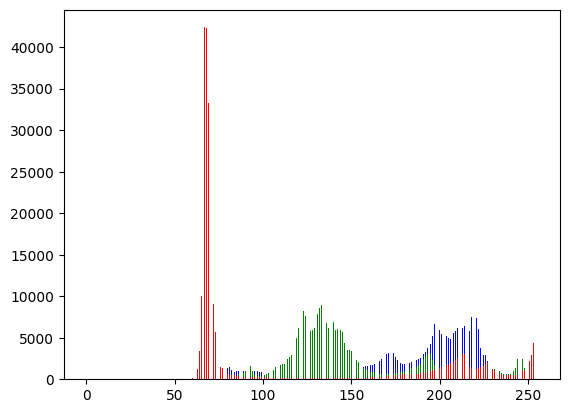

In [247]:
# imageGray = cv2.cvtColor(imageFinal,cv2.COLOR_RGB2GRAY)
brainImage = cv2.imread('imageDatabase/lego01.jpg')
brainGray = cv2.cvtColor(brainImage,cv2.COLOR_BGR2GRAY)
hist0 = cv2.calcHist([brainImage],[0],None,[256],(0,255)) # channel 0 --> blue 1--> green 2--> red
hist1 = cv2.calcHist([brainImage],[1],None,[256],(0,255))
hist2 = cv2.calcHist([brainImage],[2],None,[256],(0,255))
ind = np.arange(256)
width = 0.35
cv2.imshow('Original',brainImage)
cv2.imshow('Gray',brainGray)
cv2.waitKey(0)
pl0 = plt.bar(ind,np.squeeze(hist0),width,color='b')
pl1 = plt.bar(ind,np.squeeze(hist1),width,color='g')
pl2 = plt.bar(ind,np.squeeze(hist2),width,color='r')
plt.show()
cv2.destroyAllWindows()


3.2 - Image thresholding

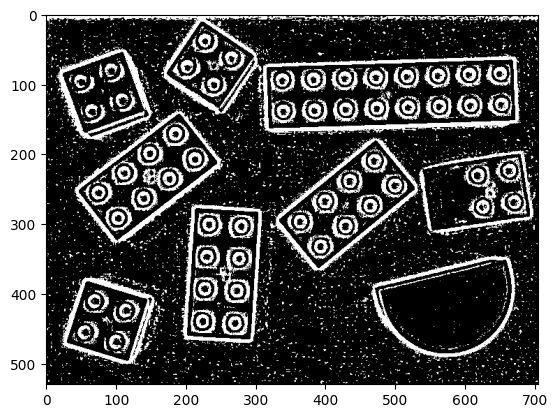

In [248]:
thresh = cv2.adaptiveThreshold(brainGray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)
# ret , thresh = cv2.threshold(brainGray,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh,'gray',vmin=0,vmax=255)

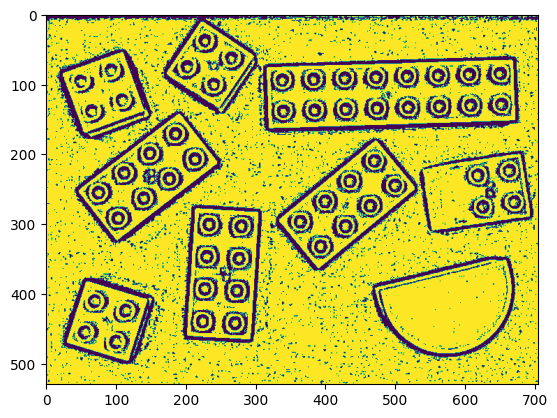

In [249]:
inverted = cv2.bitwise_not(thresh)
plt.imshow(inverted)

3.3 - Morphological operations

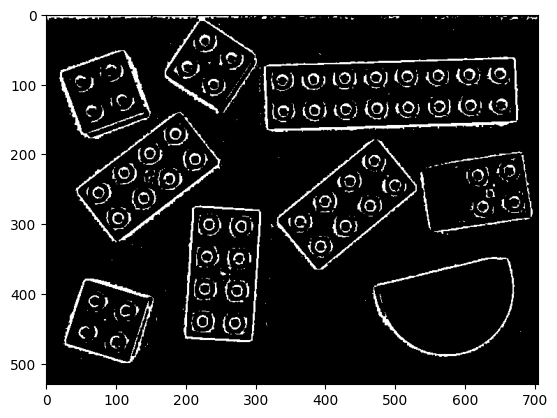

In [250]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11),(-1,-1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# erosion = cv2.erode(thresh,kernel,iterations=1)
erosion = cv2.morphologyEx(thresh,cv2.MORPH_ERODE,kernel)
# dilation = cv2.dilate(thresh,kernel,iterations=1)
dilation = cv2.morphologyEx(erosion,cv2.MORPH_DILATE,kernel)
plt.imshow(erosion,'gray',vmin=0,vmax=255)

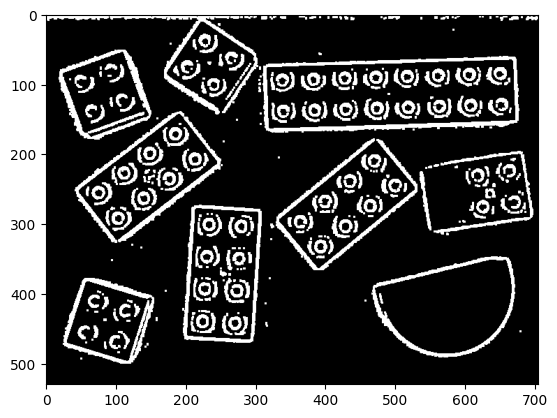

In [251]:
plt.imshow(dilation,'gray',vmin=0,vmax=255)

3.4 - Labelling

In [260]:
contours, hierarchy = cv2.findContours(dilation,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours))) 
cv2.drawContours(brainImage, contours, -1, (0, 255, 0), 3) 
cv2.imshow('Contours', brainImage) 
cv2.waitKey(0) 
cv2.destroyAllWindows()
regionNum, lb, stats, centroids = cv2.connectedComponentsWithStats(dilation)
graylevel , outImage = bwLabel.labeling(dilation)
print(regionNum)
print(graylevel)

Number of Contours found = 188
301
301


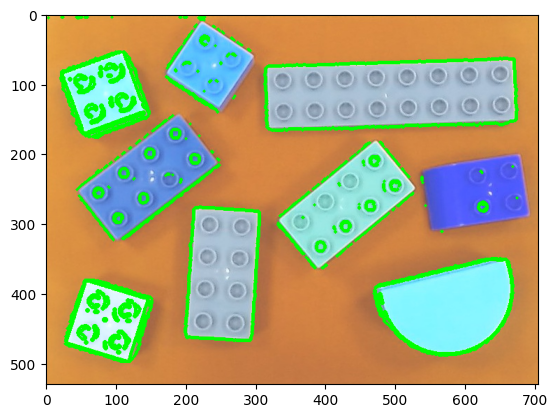

In [261]:
plt.imshow(brainImage,'gray',vmin=0,vmax=255)

In [254]:
# img = cv2.imread('imageDatabase/ImTest1.jpg')
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# thres, bw = cv2.threshold(img,127,255,cv2.THRESH_OTSU)
# print(thres)
# plt.imshow(bw,'gray',vmin=0,vmax=255)

In [255]:
# cv2.imshow('BW image',bw)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [256]:
# strElem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11),(-1,-1))

# bw1 = cv2.morphologyEx(bw,cv2.MORPH_CLOSE,kernel)
# plt.imshow(bw1,'gray',vmin=0,vmax=255)

In [257]:
# cv2.imshow('BW image',bw1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()